In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.downloader.download('vader_lexicon')

<Figure size 432x576 with 0 Axes>

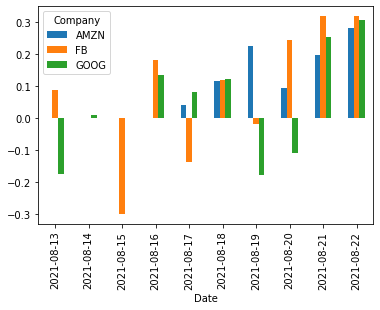

In [ ]:
finviz_url = 'https://finviz.com/quote.ashx?t='
Companys = ['AMZN', 'GOOG', 'FB'] # stock companies

news_tables = {} # Declare empty dictionary to store results from finviz

for Company in Companys:
    url = finviz_url + Company
    req = Request(url=url, headers={'user-agent':'my-app'}) # Specify headers or else access will be denied
    response = urlopen(req)
    soup = BeautifulSoup(response,features='html.parser')
    news_table = soup.find(id='news-table')
    # We get table rows
    # We get text on on td tag
    # We get time stamp on tr tag
    news_tables.update({Company:news_table}) # Key ticker (Company name) and value news_table
    

parsed_data = [] # Instantiate new list object

for Company, news_table in news_tables.items(): # This will iterate over all keys and values using the .tems() function
    for row in news_table.find_all('tr'):
        Comments = row.a.text
        date_data = row.td.text.split(' ') # Split date with space 
        # If loop to determine if date is made of 1 or 2 indexes
        if len(date_data)==1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([Company,date,time,Comments])

    

# print(parsed_data) remember the parsed data is a list of lists

df = pd.DataFrame(parsed_data, columns=['Company','Date','Time','Comments'])
# Analyse your text
vader = SentimentIntensityAnalyzer()
# When we run polarity, we get a couple of key values from the result dictionary
# 'neg', 'neu', 'pos', 'compound'
# We can pull out what ever we want to analyse from this dictionary
# Create a function and get just the compound score
# Then use the apply function to run this function
function = lambda x: vader.polarity_scores(x)['compound']
# We want to loop through our comments column
df['Compound'] = df['Comments'].apply(function)
# Convert date column to date time
df['Date'] = pd.to_datetime(df.Date).dt.date


plt.figure(figsize=(6,8))
# Using groupby makes us to have one date entry
mean_df = df.groupby(['Company','Date']).mean()
# Allow us to have date as x-axis
mean_df = mean_df.unstack()
# Remove compound column
mean_df = mean_df.xs('Compound', axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()
# print(mean_df)

In [ ]:

# Getting subset
results = df.loc[(df['Company'] =='FB') & (df['Compound'] > 0) ,['Compound','Comments']]
print(results)

     Compound                                           Comments
201    0.6369   These Are The 5 Best Stocks To Buy And Watch Now
202    0.6369  10 Best Tech Stocks to Buy According to Stanle...
205    0.3818  CommentSold CEO on Permira partnership, growth...
207    0.7184  Leases to Facebook, Netflix Boost Confidence i...
208    0.4019                         Facebook Finds Key Support
209    0.6124  Facebook, Twitter, Microsoft Beef Up Security ...
210    0.1010  Teslas Humanoid Robot Is a Sideshow. Heres Wha...
212    0.4019  Facebook teams up with Indian firm to help pro...
213    0.4019  Facebook teams up with Indian firm to help pro...
214    0.3818  Facebook moves to protect users in Afghanistan...
218    0.1779  Amazon Pushes Into Department Stores, While Fa...
220    0.3400  UPDATE 1-Facebook, Twitter and LinkedIn secure...
221    0.3400  Facebook, Twitter and LinkedIn secure Afghan u...
222    0.3182  Facebook says it is securing Afghan user accou...
223    0.6956  White Hous

In [ ]:
# Using query method

df = df[['Compound','Comments','Company']].query("Company==['FB','GOOG']")
df.to_csv('data/example.csv')
print(df)

     Compound                                           Comments Company
100    0.6369  These Are The Best Robinhood Stocks To Buy Or ...    GOOG
101   -0.0258            How Amazons Twitch Platform Makes Money    GOOG
102    0.6369  10 Best Tech Stocks to Buy According to Stanle...    GOOG
103    0.0000  One Mans Quest to Get an AI Machine a Patent G...    GOOG
104    0.3818  Growth Investors, Have You Read Lemonade's Fou...    GOOG
..        ...                                                ...     ...
295    0.5859  Facebook, Amazon seek U.S. approval to operate...      FB
296   -0.0516  Texas Cruise Outbreak; CDC Panel Backs Third S...      FB
297    0.5859  Facebook, Amazon Seek FCC Approval For Underse...      FB
298    0.5859  UPDATE 2-Facebook, Amazon seek U.S. approval t...      FB
299    0.0000  Facebook rolls out end-to-end encryption for M...      FB

[200 rows x 3 columns]


In [ ]:
# Map
# Map does not work on an entire dataframe but on a series e.g a column
data = pd.DataFrame({"power_level": [12000, 16000, 4000, 1500, 3000, 
                                     2000, 1600, 2000],
                     "uniform color": ["orange", "blue", "black", "orange",
                                       "purple", "green", "orange", "orange"],
                     "species": ["saiyan","saiyan","saiyan","half saiyan",
                                 "namak","human","human","human"]}, 
                     index = ["Goku","Vegeta", "Nappa","Gohan",
                                   "Piccolo","Tien","Yamcha", "Krillin"])

# Use .map() to apply a function to a pandas Series
# Data Frame columns are Series

def my_function(x):
    if x > 10000:
        return("high")
    if x > 2000:
        return("med")
    return ("low")


data["power_level"].map(my_function)

Goku       high
Vegeta     high
Nappa       med
Gohan       low
Piccolo     med
Tien        low
Yamcha      low
Krillin     low
Name: power_level, dtype: object

In [ ]:
# To map Series values based on key: value correspondence
# Pass a mapping dictionary to .map() 
correspondence = {"saiyan": "alien", 
                  "namak":"alien", 
                  "human":"earthling", 
                  "half saiyan": "earthling"}

data["species"].map(correspondence)

Goku           alien
Vegeta         alien
Nappa          alien
Gohan      earthling
Piccolo        alien
Tien       earthling
Yamcha     earthling
Krillin    earthling
Name: species, dtype: object